/var/folders/kq/s_bn6twd5j1_cd6kqsdz3lg80000gn/T/ipykernel_45949/3607623539.py:25: RuntimeWarning: overflow encountered in scalar multiply
  W0 = Kp * (T - Tref)
/var/folders/kq/s_bn6twd5j1_cd6kqsdz3lg80000gn/T/ipykernel_45949/3607623539.py:35: RuntimeWarning: invalid value encountered in scalar add
  T += (- L * (T - Tout) + W / C) * dt


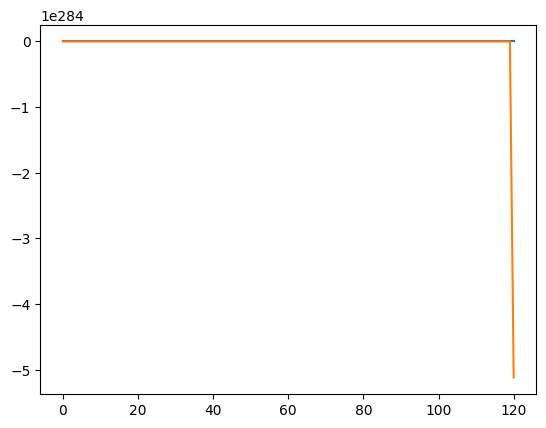

In [56]:
import numpy as np
import matplotlib.pyplot as plt

T = 300
Tout = 250
L = 0.005
K = 1
C = 1000

dt = 1
tsim = 24*60*60

Thist = []
qualhist = []

Kp = -10

vals = [0] * 500

for i in range(int(tsim / dt)):
    currtime = i * dt
    
    #W = 5 * np.sin(currtime * 0.01)
    
    W0 = Kp * (T - Tref)
    
    s = np.sin(currtime * 0.002)
    
    W = W0 + 5 * s
    
    vals[i % 500] = calc_qual(T, Tref, W, K) * s
    
    Kp -= 0.01 * np.mean(vals)
    
    T += (- L * (T - Tout) + W / C) * dt
    
    qualhist.append(calc_qual(T, Tref, W, K))
    Thist.append(T)

plt.plot(Thist)
plt.plot(qualhist)

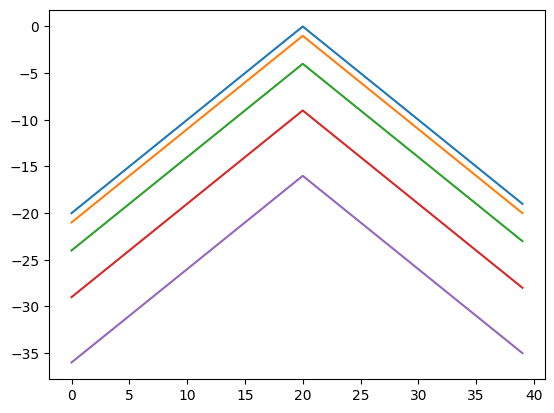

In [31]:
def calc_qual(T, Tref, W, K):
    return - K * abs(T - Tref) - W**2

Tref = 300

for j in range(5):
    quals = [calc_qual(i + Tref, Tref, j, 1) for i in range(-20, 20)]
    plt.plot(quals)

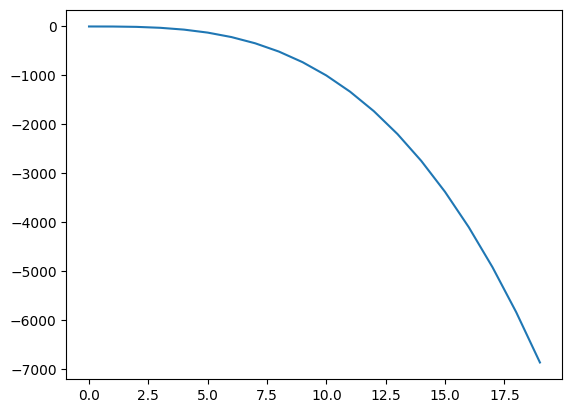

In [28]:
quals = [calc_qual(10 + Tref, Tref, i, 1) for i in range(0, 20)]
plt.plot(quals)

9.889438934893876


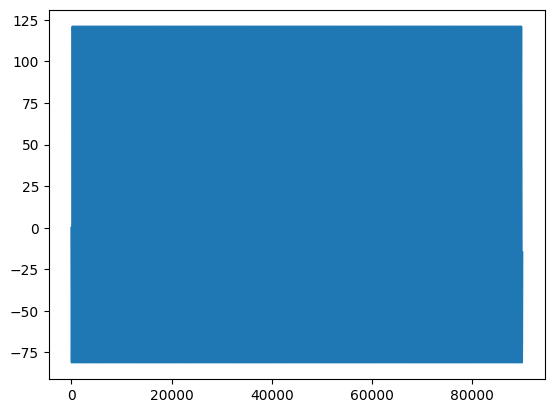

In [52]:
def func(x):
    return -x**2

vals = []

for i in range(90000):
    t = i / 50
    
    s = np.sin(t)
    
    vals.append(func(-10 + s) * s)

print(np.mean(vals))
plt.plot(vals)